In [248]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Walmart = pd.read_csv("C:\\Users\\bolla\\OneDrive\\Desktop\\Notes\\walmart_data.txt")

In [249]:
Walmart

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [250]:
print("Size of the data:", Walmart.size, "elements")

Size of the data: 5500680 elements


In [251]:
Walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [252]:
# % of missing values in each column
missing = Walmart.isna().sum()/len(Walmart)*100
missing
# There are no missing vlues in dataset

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

In [253]:
Walmart.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


The dataset contains 550068 rows , 10 columns  , basically the dataset contains 550068 transaction data .
There are no missing values in the data .
The mean and median of product category are nearly same , Mean and median of Occupation have a difference of nearly 1 value , Mean and median of purchase have a difference of nearly 1000 .
Occupation , product category  and  purchase  have a max higher than 75 percentile which means they have outliers .


In [254]:
Walmart.duplicated().value_counts()

False    550068
dtype: int64

We can see that there are no duplicte transctions in the dataset

In [255]:
Walmart[["Gender"]].value_counts()

Gender
M         414259
F         135809
dtype: int64

In [256]:
Walmart[["Marital_Status"]].value_counts()

Marital_Status
0                 324731
1                 225337
dtype: int64

In [257]:
Walmart[["Product_Category"]].value_counts()

Product_Category
5                   150933
1                   140378
8                   113925
11                   24287
2                    23864
6                    20466
3                    20213
4                    11753
16                    9828
15                    6290
13                    5549
10                    5125
12                    3947
7                     3721
18                    3125
20                    2550
19                    1603
14                    1523
17                     578
9                      410
dtype: int64

There are a total of 20 product categories among them categories 5,1,8 have Top 3 number of transactions .


In [258]:
Walmart[["Occupation"]].value_counts()

Occupation
4             72308
0             69638
7             59133
1             47426
17            40043
20            33562
12            31179
14            27309
2             26588
16            25371
6             20355
3             17650
10            12930
5             12177
15            12165
11            11586
19             8461
13             7728
18             6622
9              6291
8              1546
dtype: int64

In [259]:
Walmart[["Product_ID"]].nunique()

Product_ID    3631
dtype: int64

In [260]:
Walmart[["User_ID"]].nunique()

User_ID    5891
dtype: int64

There are a total of 3631 product_id’s and 5891 user_id’s.

In [261]:
Walmart[["City_Category"]].value_counts()

City_Category
B                231173
C                171175
A                147720
dtype: int64

In [262]:
Walmart.groupby("Gender")["User_ID"].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

<AxesSubplot:ylabel='Purchase'>

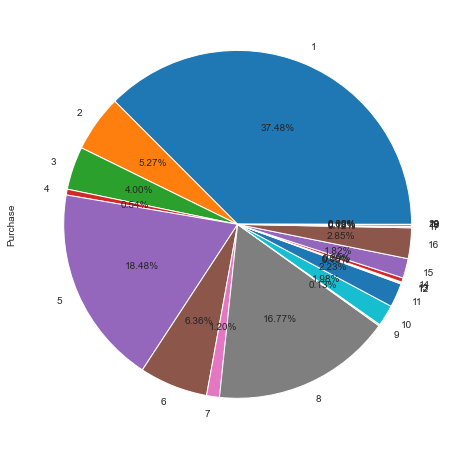

In [263]:
fig1, ax1 = plt.subplots(figsize=(12, 8))
Walmart.groupby("Product_Category")["Purchase"].sum().plot(kind="pie",autopct="%1.2f%%",)

In [264]:
Walmart.groupby("Age")["User_ID"].nunique()

Age
0-17      218
18-25    1069
26-35    2053
36-45    1167
46-50     531
51-55     481
55+       372
Name: User_ID, dtype: int64

In [265]:
Walmart.groupby("Stay_In_Current_City_Years")["User_ID"].nunique()

Stay_In_Current_City_Years
0      772
1     2086
2     1145
3      979
4+     909
Name: User_ID, dtype: int64

In [266]:
Walmart[["Occupation"]].value_counts()

Occupation
4             72308
0             69638
7             59133
1             47426
17            40043
20            33562
12            31179
14            27309
2             26588
16            25371
6             20355
3             17650
10            12930
5             12177
15            12165
11            11586
19             8461
13             7728
18             6622
9              6291
8              1546
dtype: int64

We can observe that occupation less than 7 have more transactions and they are mostly from city category B.
We can clearly see more than 40% of the transactions are from city category B.
26% of transactions are from City category A, 42% from City category B, 31% from City category C.


In [267]:
### Quantative attributes in data are 
###Age	Occupation	Product_Category	Stay_In_Current_City_Years

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Count'>

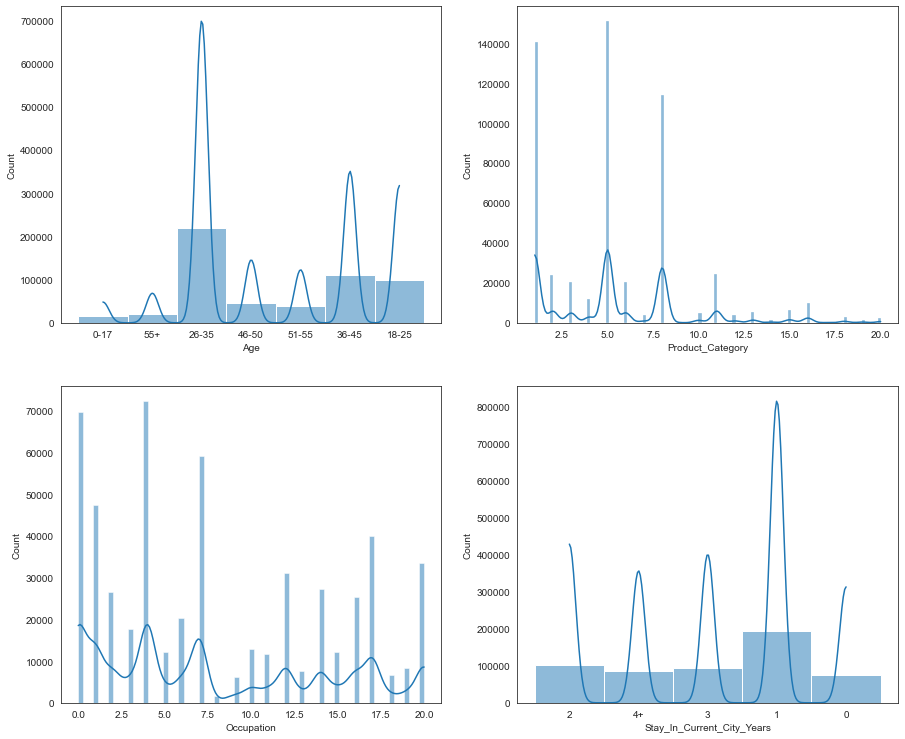

In [268]:
fig, axis = plt.subplots(nrows = 2, ncols = 2, figsize =(15,9))
fig.subplots_adjust(top=1.2)

sns.histplot(data =Walmart , x ='Age', kde = True , ax =axis[0,0] )
sns.histplot(data =Walmart , x ='Occupation', kde = True , ax =axis[1,0] )
sns.histplot(data =Walmart , x ='Product_Category', kde = True , ax =axis[0,1] )
sns.histplot(data =Walmart , x ='Stay_In_Current_City_Years', kde = True , ax =axis[1,1] )

<AxesSubplot:xlabel='Age', ylabel='count'>

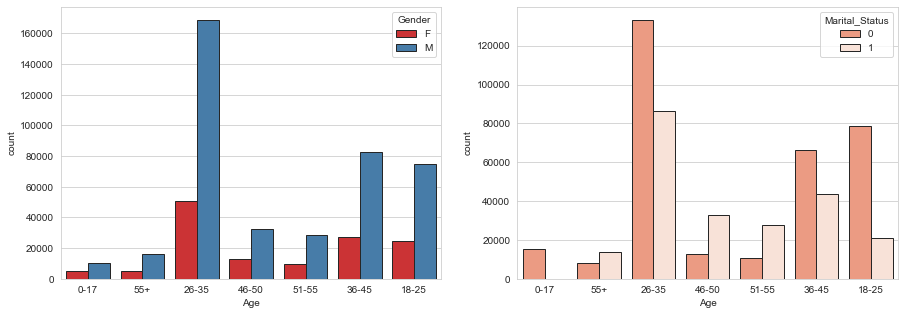

In [269]:
sns.set_style("whitegrid")

fig , axis = plt.subplots(nrows = 1 , ncols = 2 , figsize = (15,5))
sns.countplot(data =Walmart , x ='Age',hue = "Gender" ,edgecolor="0.15", palette='Set1', ax =axis[0])
sns.countplot(data =Walmart , x ='Age', hue = "Marital_Status",edgecolor="0.15", palette=["#fc9272","#fee0d2"] , ax =axis[1])



<AxesSubplot:xlabel='Occupation', ylabel='count'>

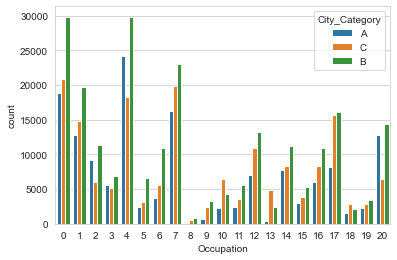

In [270]:
sns.countplot(data =Walmart , x ='Occupation',  hue = "City_Category")

<AxesSubplot:xlabel='Purchase', ylabel='Count'>

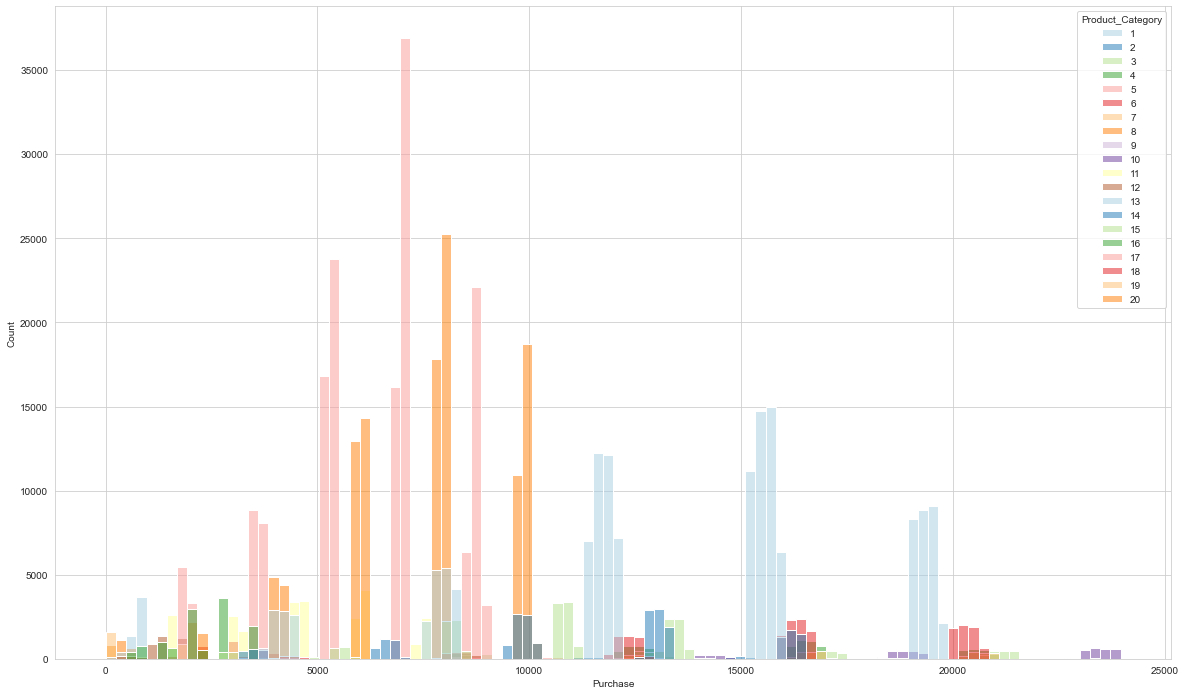

In [271]:
fig1, ax1 = plt.subplots(figsize=(20, 12))


sns.histplot(data=Walmart, x="Purchase",hue = "Product_Category", palette = "Paired" ,bins=100)


More number of transactions are of purchase between 5000 to 10000 and product category 13&1 have purchase higher than 10000 


In [272]:
### Qualitative attributes in data are 

### City_Category		Gender	Marital_Status

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

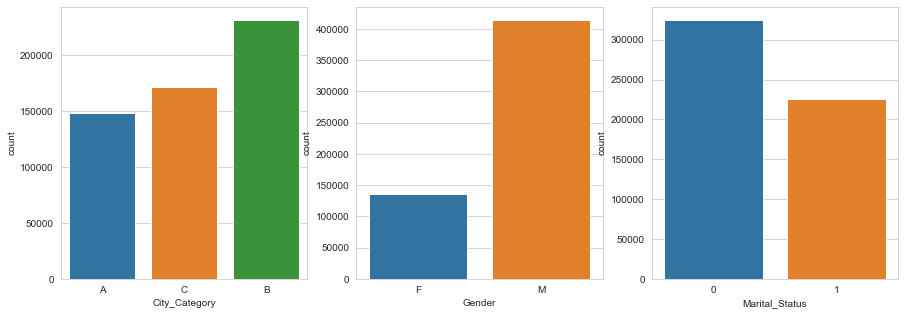

In [273]:
fig , axis = plt.subplots(nrows = 1 , ncols = 3 , figsize = (15,5))

sns.countplot(data =Walmart , x ='City_Category',  ax =axis[0])
sns.countplot(data =Walmart , x ='Gender',  ax =axis[1])
sns.countplot(data =Walmart , x ='Marital_Status',  ax =axis[2])

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

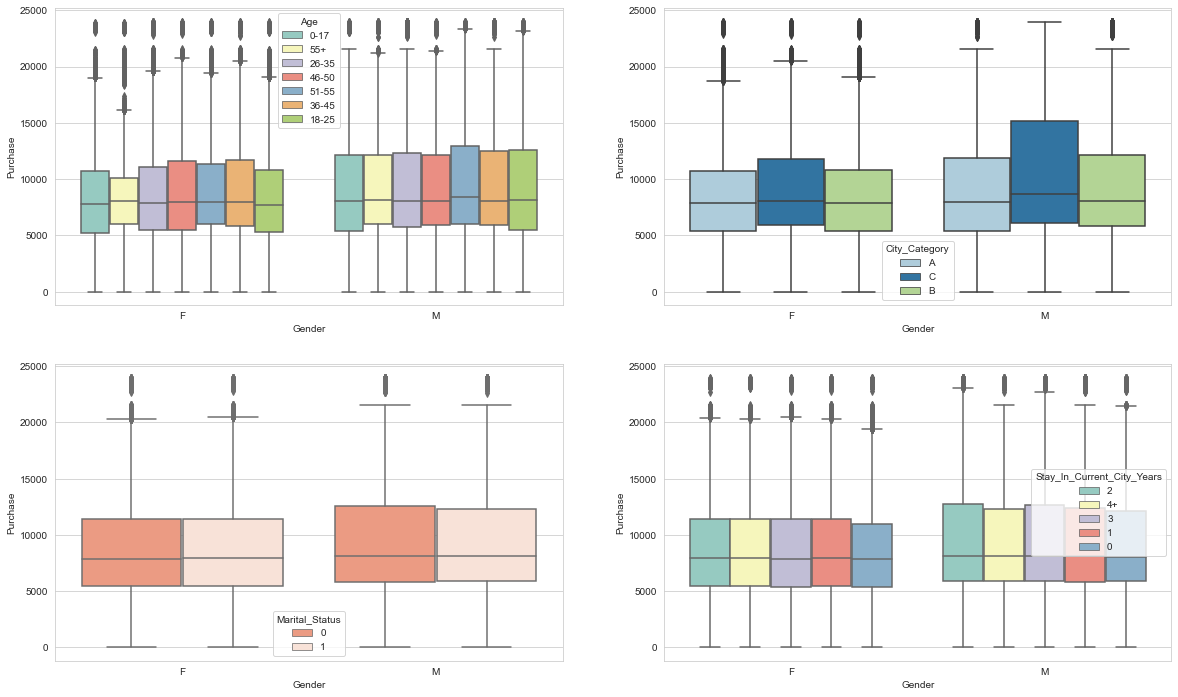

In [274]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

sns.boxplot(data=Walmart, y='Purchase', x='Gender', hue='Age', palette='Set3', ax=axs[0,0])
sns.boxplot(data=Walmart, y='Purchase', x='Gender', hue='City_Category', palette="Paired", ax=axs[0,1])
sns.boxplot(data=Walmart, y='Purchase', x='Gender', hue='Marital_Status', palette=["#fc9272","#fee0d2"], ax=axs[1,0])
sns.boxplot(data=Walmart, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', palette='Set3', ax=axs[1,1])

There is not much fluctuation in median’s of male and female with regard to purchasing in marital status and Stay_In_Current_City_Years but Median of city category “C” is slightly higher in both males and females also males with age group 51-55 , females with age group 55+  have slightly higher Median.


In [275]:
pd_df = Walmart[["Gender","Marital_Status","City_Category"]].melt()

In [276]:
pd_df.groupby(["variable","value"])["value"].count()/len(Walmart)

variable        value
City_Category   A        0.268549
                B        0.420263
                C        0.311189
Gender          F        0.246895
                M        0.753105
Marital_Status  0        0.590347
                1        0.409653
Name: value, dtype: float64

% of transctions done by each category 

<AxesSubplot:>

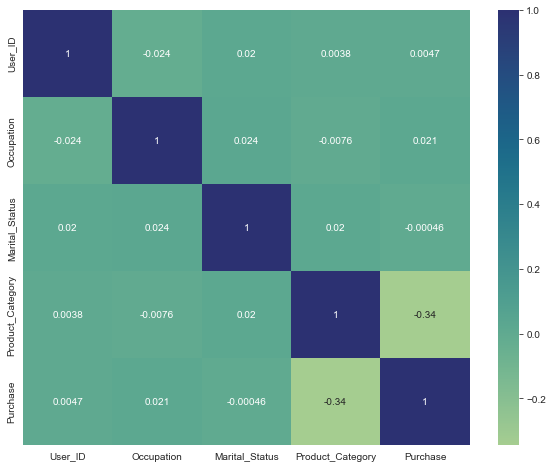

In [277]:
plt.figure(figsize=(10,8))
sns.heatmap(Walmart.corr(),cmap="crest",annot= True)

<AxesSubplot:xlabel='Purchase'>

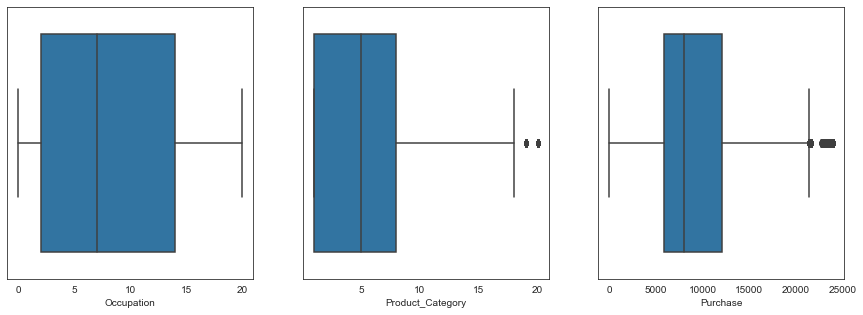

In [278]:
sns.set_style("white")
fig , axis = plt.subplots(nrows = 1 , ncols = 3 , figsize = (15,5))
sns.boxplot(data =Walmart , x ='Occupation',  ax =axis[0])
sns.boxplot(data =Walmart , x ='Product_Category',  ax =axis[1])
sns.boxplot(data =Walmart , x ='Purchase',  ax =axis[2])


In [279]:
# Outlier treatment 
### As this is a categolical value , replacing the outliers with nerest non-ourlier

Walmart["Product_Category_new"] = np.where(Walmart["Product_Category"] >= 18 , 18 , Walmart["Product_Category"] )



In [280]:
# Outlier treatment 

Q1 = Walmart["Purchase"].quantile(0.25)
Q3 = Walmart["Purchase"].quantile(0.75)
IQR = Q3-Q1

upper = Q3 +(1.5*IQR)

Walmart["Purchase_new"] = np.where(Walmart["Purchase"] > upper , upper , Walmart["Purchase"] )


<AxesSubplot:xlabel='Purchase_new'>

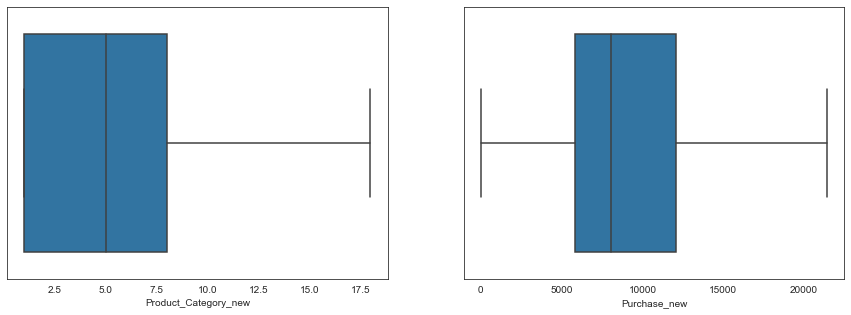

In [281]:
fig , axis = plt.subplots(nrows = 1 , ncols = 2 , figsize = (15,5))
sns.boxplot(data =Walmart , x ='Product_Category_new',  ax =axis[0])
sns.boxplot(data =Walmart , x ='Purchase_new',  ax =axis[1])


## CLT & Confidence interval 

In [282]:
g_walmart = Walmart.groupby(["User_ID","Gender"])["Purchase_new"].sum()
g_walmart = g_walmart.reset_index()
g_walmart

,User_ID,Gender,Purchase_new
0,1000001,F,334093.0
1,1000002,M,810472.0
2,1000003,M,341635.0
3,1000004,M,206468.0
4,1000005,M,821001.0
...,...,...,...
5886,1006036,F,4112080.0
5887,1006037,F,1117224.5
5888,1006038,F,90034.0
5889,1006039,F,585473.0


In [283]:
male_df = g_walmart[g_walmart['Gender']=="M"]
female_df = g_walmart[g_walmart['Gender']=="F"]

In [284]:
m_samples = 3000
f_samples = 1500
no_itrations = 1000

male_means = [male_df.Purchase_new.sample(m_samples).mean() for i in range(no_itrations)]
female_means = [female_df.Purchase_new.sample(f_samples).mean() for i in range(no_itrations)]
    
male_means = pd.Series(male_means)    
female_means = pd.Series(female_means)    


C:\Users\bolla\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bolla\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

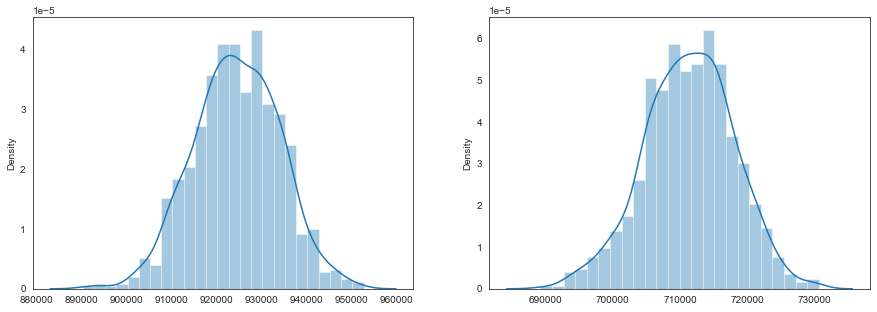

In [285]:
fig , axis = plt.subplots(nrows = 1 , ncols = 2 , figsize = (15,5))
sns.distplot(male_means, ax =axis[0])
sns.distplot(female_means, ax =axis[1])


After sample mean testing we can see the distribution of male and female means is normal distribution

In [286]:
print("male_means_mean :" , male_means.mean())
print("male_df_mean :" , male_df["Purchase_new"].mean())
print(' ')
print("female_means_mean :" , female_means.mean())
print("female_df_mean :", female_df["Purchase_new"].mean())

male_means_mean : 924453.6293753344
male_df_mean : 924446.9962130177
 
female_means_mean : 711343.3667016665
female_df_mean : 711347.0261104442


The means of purchase_new of male and female datasets are almost equal to population means  of male and female

In [300]:
male_margin_error = 1.96*male_df["Purchase_new"].std()/np.sqrt(len(male_df))
print("male_margin_error :", male_margin_error)
male_sample_mean = male_df["Purchase_new"].mean()
print("male_sample_mean :", male_sample_mean)
male_lower_limit = male_sample_mean - male_margin_error
male_upper_limit = male_sample_mean + male_margin_error
print("male_lower_limit :", male_lower_limit)
print("male_upper_limit :", male_upper_limit)

male_margin_error : 29704.921743433908
male_sample_mean : 924446.9962130177
male_lower_limit : 894742.0744695838
male_upper_limit : 954151.9179564517


We can see that in 95% of population the average amount spent by male customers will lye in between: (894742.07  to  954151.91)


In [288]:
female_margin_error = 1.96*female_df["Purchase_new"].std()/np.sqrt(len(female_df))
print("female_margin_error :", female_margin_error)
female_sample_mean = female_df["Purchase_new"].mean()
print("female_sample_mean :", female_sample_mean)
female_lower_limit = female_sample_mean - female_margin_error
female_upper_limit = female_sample_mean + female_margin_error
print("female_lower_limit :", female_lower_limit)
print("female_upper_limit :", female_upper_limit)


female_margin_error : 38739.9024259929
female_sample_mean : 711347.0261104442
female_lower_limit : 672607.1236844513
female_upper_limit : 750086.9285364371


We can see that in 95% of the population the average amount spent by female customers will lye in between: (672607.12  to 750086.92).


Here we can see that confidence intervals of average male and female spending are not overlapping .

In [289]:
m_walmart = Walmart.groupby(["User_ID","Marital_Status"])["Purchase_new"].sum()
m_walmart = m_walmart.reset_index()
m_walmart

,User_ID,Marital_Status,Purchase_new
0,1000001,0,334093.0
1,1000002,0,810472.0
2,1000003,0,341635.0
3,1000004,1,206468.0
4,1000005,1,821001.0
...,...,...,...
5886,1006036,1,4112080.0
5887,1006037,0,1117224.5
5888,1006038,0,90034.0
5889,1006039,1,585473.0


In [290]:
single_df = m_walmart[m_walmart['Marital_Status']==0]
partnered_df = m_walmart[m_walmart['Marital_Status']==1]

In [291]:
s_samples = 3000
p_samples = 2000
no_itrations = 1000

single_means = [single_df.Purchase_new.sample(s_samples).mean() for i in range(no_itrations)]
partnered_means = [partnered_df.Purchase_new.sample(p_samples).mean() for i in range(no_itrations)]
    
single_means = pd.Series(single_means)    
partnered_means = pd.Series(partnered_means)    


C:\Users\bolla\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bolla\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

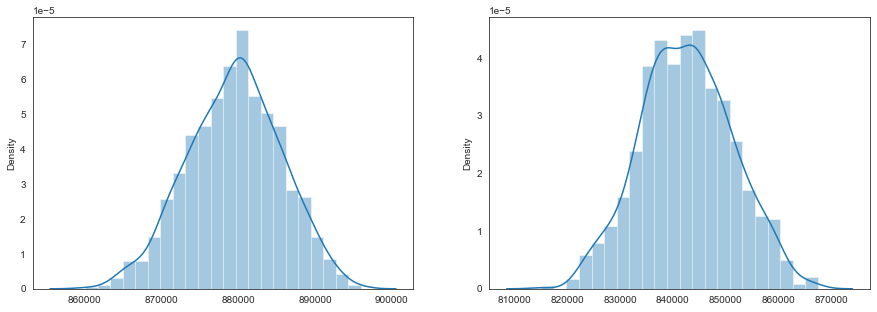

In [292]:
fig , axis = plt.subplots(nrows = 1 , ncols = 2 , figsize = (15,5))
sns.distplot(single_means, ax =axis[0])
sns.distplot(partnered_means, ax =axis[1])


In [293]:
print("single_means_mean :" ,single_means.mean())
print("single_df_mean :" , single_df.Purchase_new.mean())
print(' ')
print("partnered_means_mean :" , partnered_means.mean())
print("partnered_df_mean :", partnered_df.Purchase_new.mean())

single_means_mean : 879518.1909755007
single_df_mean : 879778.4795141937
 
partnered_means_mean : 842576.3122654998
partnered_df_mean : 842639.3047696039


In [294]:
single_margin_error = 1.96*single_df["Purchase_new"].std()/np.sqrt(len(single_df))
print("single_margin_error :", single_margin_error)
single_sample_mean = single_df["Purchase_new"].mean()
print("single_sample_mean :", single_sample_mean)
single_lower_limit = single_sample_mean - single_margin_error
single_upper_limit = single_sample_mean + single_margin_error
print("single_lower_limit :", single_lower_limit)
print("single_upper_limit :", single_upper_limit)


single_margin_error : 31810.38269454745
single_sample_mean : 879778.4795141937
single_lower_limit : 847968.0968196463
single_upper_limit : 911588.8622087411


We can see that in 95% of population the average amount spent by single customers will lye in between: (847968.09  to 911588.86)


In [295]:
partnered_margin_error = 1.96*partnered_df["Purchase_new"].std()/np.sqrt(len(partnered_df))
print("partnered_margin_error :", partnered_margin_error)
partnered_sample_mean = partnered_df["Purchase_new"].mean()
print("partnered_sample_mean :", partnered_sample_mean)
partnered_lower_limit = partnered_sample_mean - partnered_margin_error
partnered_upper_limit = partnered_sample_mean + partnered_margin_error
print("partnered_lower_limit :", partnered_lower_limit)
print("partnered_upper_limit :", partnered_upper_limit)


partnered_margin_error : 36831.73250151966
partnered_sample_mean : 842639.3047696039
partnered_lower_limit : 805807.5722680843
partnered_upper_limit : 879471.0372711235


We can see that in 95% of the population the average amount spent by partnered customers will lye in between: (805807.57  to 879471.03).


Here we can see that confidence intervals of average single and partnered spending are overlapping .

In [296]:
a_walmart = Walmart.groupby(["User_ID","Age"])["Purchase_new"].sum()
a_walmart = a_walmart.reset_index()
a_walmart.Age.value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

In [297]:
a_samples = 300
no_itrations = 1000
age_means = {}

ages = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']

for age in ages :
    age_means[age] = []

for i in ages:
    for j in range(no_itrations) :
        
        sample_mean = a_walmart[a_walmart["Age"]==i].Purchase_new.sample(a_samples,replace = True).mean()
        age_means[i].append(sample_mean)
        
        

C:\Users\bolla\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

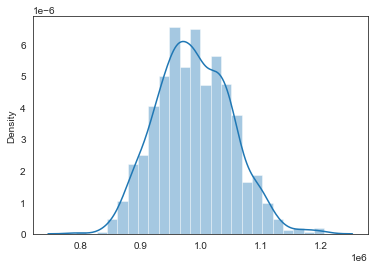

In [298]:
sns.distplot(age_means['26-35'])


In [299]:
for i in ages :
    new_df = a_walmart[a_walmart["Age"]==i]
    
    margin_error = 1.96*new_df["Purchase_new"].std()/np.sqrt(len(new_df))
   
    age_sample_mean = new_df["Purchase_new"].mean()

    lower_limit = age_sample_mean - margin_error
    upper_limit = age_sample_mean + margin_error
    print("Age ", i , "lower_limit :", lower_limit)
    print("Age ", i , "upper_limit :", upper_limit)
    print("")


Age  26-35 lower_limit : 944236.9813431879
Age  26-35 upper_limit : 1033425.1618618779

Age  36-45 lower_limit : 822400.2026876162
Age  36-45 upper_limit : 934958.6867725381

Age  18-25 lower_limit : 801152.1205205085
Age  18-25 upper_limit : 907553.4566544214

Age  46-50 lower_limit : 712701.9071513726
Age  46-50 upper_limit : 870658.0533006047

Age  51-55 lower_limit : 691268.462455817
Age  51-55 upper_limit : 832692.4356730811

Age  55+ lower_limit : 476083.82184155483
Age  55+ upper_limit : 601401.6996638215

Age  0-17 lower_limit : 527250.5763774607
Age  0-17 upper_limit : 709387.0291271263



Most of the Users are between 18-50 years of age.


We can see that in 95% of the population the average amount spent by Age group 26-35 customers will lye in between: (944236.98  to 1033425.16).


We can see that in 95% of the population the average amount spent by Age group 36-45 customers will lye in between: (822400.20  to 934958.68).


We can see that in 95% of the population the average amount spent by Age group 18-25 customers will lye in between: (801152.12  to 907553.45).


We can see that in 95% of the population the average amount spent by Age group 46-50 customers will lye in between: (712701.90  to 870658.05).


We can see that in 95% of the population the average amount spent by Age group 51-55 customers will lye in between: (691268.46  to 832692.43).


We can see that in 95% of the population the average amount spent by Age group 55+ customers will lye in between: (476083.82  to 601401.69).


We can see that in 95% of the population the average amount spent by Age group 0-17 customers will lye in between: (527250.57  to 709387.02).


We can see that confidence interval  of age groups 18-25 & 36-45 overlapping , age group 26-35 have confidence interval slightly higher than 18-25 & 36-45 .


# Insights 

The dataset contains 550068 rows , 10 columns  , basically the dataset contains 550068 transaction data .
There are no missing values in the data .
The mean and median of product category are nearly same , Mean and median of Occupation have a difference of nearly 1 value , Mean and median of purchase have a difference of nearly 1000 .
Occupation , product category  and  purchase  have a max higher than 75 percentile which means they have outliers .
Total number of transactions done by Males is 414259 and by females is 135809.
Total number of transactions done by Singles is 324731 and by Partnered people is 225337.
There are a total of 20 product categories among them categories 5,1,8 have Top 3 number of transactions .
There are a total of 3631 product_id’s and 5891 user_id’s.
Total 3 City_Categories A has 147720 , B has 231173 , C has 171175 transactions with Category B as top.
Total number of Male Unique User_ID’s are 4225 and the total number of Fe-male Unique User_ID’s are 1666, where it shows male customers are more than female .
Product category 1 has the highest purchase with 37.48% form over all purchase.
The highest number of customers between  the ages 26-35 and lowest are between 0-17.
Most customers have stayed in the city for one year.
Single people with age between 26-35 have contributed the highest number of transactions, even partnered people between 26-35 have the highest number of transactions among partnered but not as high as single people.
Males have a domination over the number of transactions 	
We can observe that occupation less than 7 have more transactions and they are mostly from city category B.
We can clearly see more than 40% of the transactions are from city category B.
26% of transactions are from City category A, 42% from City category B, 31% from City category C.
In box plot we can observe that product category and Purchases
More number of transactions are of purchase between 5000 to 10000 and product category 13&1 have purchase higher than 10000 
There is not much fluctuation in median’s of male and female with regard to purchasing in marital status and Stay_In_Current_City_Years but Median of city category “C” is slightly higher in both males and females also males with age group 51-55 , females with age group 55+  have slightly higher Median.
After sample mean testing we can see the distribution of male and female means is normal distribution
The means of purchase_new of male and female datasets are almost equal to population means  of male and female 
Average spend per male customer is 924452.24
Average spend per female customer is 711307.70
We can see that in 95% of population the average amount spent by male customers will lye in between: (894742.07  to  954151.91)
We can see that in 95% of the population the average amount spent by female customers will lye in between: (672607.12  to 750086.92).
Here we can see that confidence intervals of average male and female spending are not overlapping .
After sample mean testing we can see the distribution of single and partnered means is normal distribution
The means of purchase_new of single and partnered datasets are almost equal to population means  of single and partnered 
Average spend per single customer is 879956.43
Average spend per partnered customer is 842390.29
The Average spends of single and partnered also seems nearly equal with very minute difference
We can see that in 95% of population the average amount spent by single customers will lye in between: (847968.09  to 911588.86)
We can see that in 95% of the population the average amount spent by partnered customers will lye in between: (805807.57  to 879471.03).
Here we can see that confidence intervals of average single and partnered spending are overlapping .
Most of the Users are between 18-50 years of age.
We can see that in 95% of the population the average amount spent by Age group 26-35 customers will lye in between: (944236.98  to 1033425.16).
We can see that in 95% of the population the average amount spent by Age group 36-45 customers will lye in between: (822400.20  to 934958.68).
We can see that in 95% of the population the average amount spent by Age group 18-25 customers will lye in between: (801152.12  to 907553.45).
We can see that in 95% of the population the average amount spent by Age group 46-50 customers will lye in between: (712701.90  to 870658.05).
We can see that in 95% of the population the average amount spent by Age group 51-55 customers will lye in between: (691268.46  to 832692.43).
We can see that in 95% of the population the average amount spent by Age group 55+ customers will lye in between: (476083.82  to 601401.69).
We can see that in 95% of the population the average amount spent by Age group 0-17 customers will lye in between: (527250.57  to 709387.02).
We can see that confidence interval  of age groups 18-25 & 36-45 overlapping , age group 26-35 have confidence interval slightly higher than 18-25 & 36-45 .


# Recommendations 

We can clearly see that Males and Singles have dominated in the aspect of number of transactions , so adding items that match with usage of each other by placing that combination products at immediate shelfs can increase the sales from Males and singles .
For females and Partnered customers , to increase the number of transactions , which also means the number of times they visit to walmart to shop , installing babycare facility for customers , play zone for kids and also foods like snacks and beverage will help to attract customers to spend time in walmart as usually taking care of kids during shopping always seem a burden , also with food available it becomes a chill spot after shopping.
People who are young and middle aged seem to do more shopping , to improve the transactions in remaining age category like old age people 45 and above years , special billing lines could help as there would be less waiting time , less standing in line , hence old age employee friendly.
Product categories that have low transactions like 14,17,9  can be considered as less used items , which can be stocked in low quantities and  Product categories that have high transactions like 5,1,3 have high usage , hence have to be restocked frequently .
City category A has very low transactions which can be improved by creating
Seasonal  offers and digital marketing , alsohome delivery on a minimum spend.
Occupation more than 7 have very low number of transaction frequency , where we can assume as the occupation rate increases free time may decrease to do live shopping, hence adapting a local e-commerce app or website , where the customers add items to their cart and pay the bill with additional delivery fee and the items can be delivered to home with in 1 day.
Products with cost range of 500 to 10000 have more transactions which can be considered as frequently used items , these items are to be restocked frequently and creating a combo with one item that has high transactions and other has low transactions may help in boosting the lower transaction item sales.
The range of purchase in city category “C” is higher compared to other categories, decreasing the offers in this area and investing it in other two city categories in the form of discounts would make a change in income generated without any new investment.
In both males and females old aged people have higher median and range in purchase , which means even though there are less transactions , these people tend to buy high cost products , so to increase these further more , implementing Ideas like rearranging selected products by targeting these customers with a separate billing line can help a lot.


